In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data

cwd = os.getcwd()
if os.path.basename(cwd) == "dataset":
    PROJECT_ROOT = os.path.dirname(cwd)
else:
    PROJECT_ROOT = cwd

data_path = os.path.join(PROJECT_ROOT, "data", "agg_df.csv")

if not os.path.exists(data_path):
    raise FileNotFoundError(f"[Error] Could not find file: {data_path}")

print(f"Loading dataset from: {data_path}")
df = pd.read_csv(data_path)

print("Dataset loaded:", df.shape, "rows/columns")


Loading dataset from: /Users/lisahercot/code/Lisaht03/project_accidents/data/agg_df.csv
Dataset loaded: (204145, 25) rows/columns


In [6]:
# 1) BASIC INFO

print("\n=== DATASET INFO ===")
print(df.info())

print("\n=== FIRST 5 ROWS ===")
display(df.head())



=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204145 entries, 0 to 204144
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   accident_number    204145 non-null  int64  
 1   date               204145 non-null  object 
 2   day_of_week        204145 non-null  object 
 3   hour               204145 non-null  int64  
 4   road_category      204145 non-null  object 
 5   road_layout        204145 non-null  object 
 6   num_lanes          204145 non-null  int64  
 7   reserved_lane      204145 non-null  object 
 8   road_profile       204145 non-null  object 
 9   road_shape         204145 non-null  object 
 10  surface_condition  204145 non-null  object 
 11  infrastructure     204145 non-null  object 
 12  road_location      204145 non-null  object 
 13  speed_limit        204145 non-null  int64  
 14  injury_severity    204145 non-null  int64  
 15  users_involved     204145 non

,accident_number,date,day_of_week,hour,road_category,road_layout,num_lanes,reserved_lane,road_profile,road_shape,...,users_involved,light_conditions,department,urban_area,intersection_type,weather,collision_type,latitude,longitude,region
0,201900000001,2019-11-30,Saturday,1,Major Roads,Multi Lane,10,No value,Flat,Curved,...,3,Night,93,Outside urban area,No junction,Normal,2-car collision,48.896210,2.470120,Île-de-France
1,201900000002,2019-11-30,Saturday,2,Major Roads,One Way,2,No value,Slope / Near Slope,Curved,...,1,Night,93,Outside urban area,No junction,Normal,Multi-car collision,48.930700,2.368800,Île-de-France
2,201900000003,2019-11-28,Thursday,15,Major Roads,Multi Lane,8,No value,Flat,Curved,...,4,Day,92,Outside urban area,No junction,Normal,Multi-car collision,48.935872,2.319174,Île-de-France
3,201900000004,2019-11-30,Saturday,20,Major Roads,Multi Lane,5,No value,Flat,Straight,...,4,Night,94,Outside urban area,No junction,Normal,Multi-car collision,48.817329,2.428150,Île-de-France
4,201900000005,2019-11-30,Saturday,4,Major Roads,One Way,3,No value,Flat,Curved,...,3,Night,94,Outside urban area,No junction,Normal,2-car collision,48.776362,2.433254,Île-de-France


In [7]:
# 2) MISSING VALUES

print("\n=== MISSING VALUES PER COLUMN ===")
missing = df.isna().sum().sort_values(ascending=False)
display(missing)


=== MISSING VALUES PER COLUMN ===


light_conditions     6
accident_number      0
speed_limit          0
longitude            0
latitude             0
collision_type       0
weather              0
intersection_type    0
urban_area           0
department           0
users_involved       0
injury_severity      0
road_location        0
date                 0
infrastructure       0
surface_condition    0
road_shape           0
road_profile         0
reserved_lane        0
num_lanes            0
road_layout          0
road_category        0
hour                 0
day_of_week          0
region               0
dtype: int64

In [15]:
# 3) SUMMARY STATISTICS

# Remove accident_number from dataframe
if "accident_number" in df.columns:
    df = df.drop(columns=["accident_number"])

print("\n=== NUMERICAL SUMMARY ===")
display(df.describe())

print("\n=== CATEGORICAL SUMMARY ===")
cat_cols = df.select_dtypes(include=["object"]).columns
display(df[cat_cols].describe())



=== NUMERICAL SUMMARY ===


,hour,num_lanes,speed_limit,injury_severity,users_involved,department,latitude,longitude
count,204145.000000,204145.00000,204145.000000,204145.000000,204145.000000,204145.000000,204145.000000,204145.000000
mean,13.522315,2.47191,60.182321,1.327948,2.257405,57.815136,47.133170,2.583998
std,5.467511,1.28117,21.821900,0.544889,1.199932,28.489721,2.196470,2.465656
min,0.000000,1.00000,10.000000,1.000000,1.000000,1.000000,11.000000,-5.098181
25%,9.000000,2.00000,50.000000,1.000000,2.000000,33.000000,45.433014,1.458270
50%,14.000000,2.00000,50.000000,1.000000,2.000000,66.000000,48.104910,2.388995
75%,18.000000,3.00000,80.000000,2.000000,3.000000,80.000000,48.866870,4.604564
max,23.000000,12.00000,130.000000,3.000000,65.000000,95.000000,51.077465,11.000000



=== CATEGORICAL SUMMARY ===


,date,day_of_week,road_category,road_layout,reserved_lane,road_profile,road_shape,surface_condition,infrastructure,road_location,light_conditions,urban_area,intersection_type,weather,collision_type,region
count,204145,204145,204145,204145,204145,204145,204145,204145,204145,204145,204139,204145,204145,204145,204145,204145
unique,1461,7,4,3,3,2,2,2,4,4,3,2,4,7,3,12
top,2021-06-11,Friday,Local & Access Roads,Two Way,No value,Flat,Straight,Normal,No value,Road,Day,Inside urban area,No junction,Normal,2-car collision,Île-de-France
freq,244,33828,89673,136856,182439,165998,165049,161443,172713,170491,137147,131239,130881,168174,108977,65093



=== NUMERICAL HISTOGRAMS ===


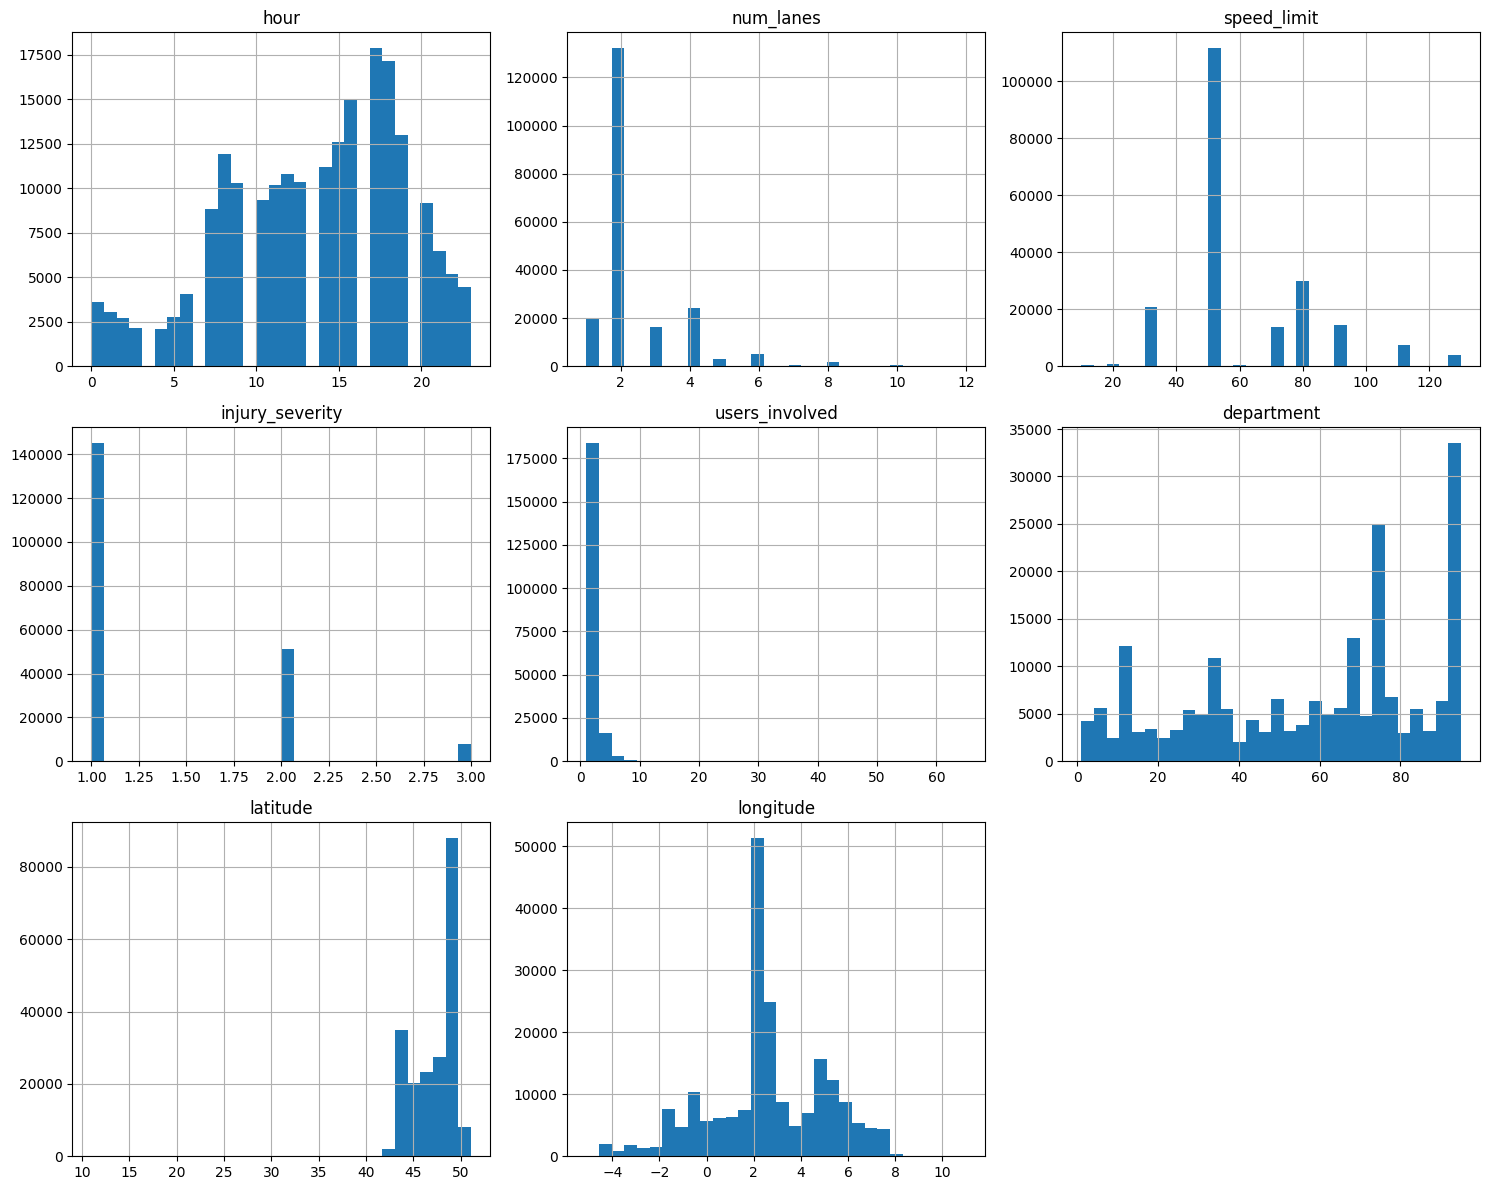

In [16]:
# 4) HISTOGRAMS FOR NUMERICAL COLUMNS

# Remove accident_number from dataframe
if "accident_number" in df.columns:
    df = df.drop(columns=["accident_number"])

num_cols = df.select_dtypes(include=[np.number]).columns

print("\n=== NUMERICAL HISTOGRAMS ===")
df[num_cols].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()


=== CATEGORICAL DISTRIBUTIONS ===


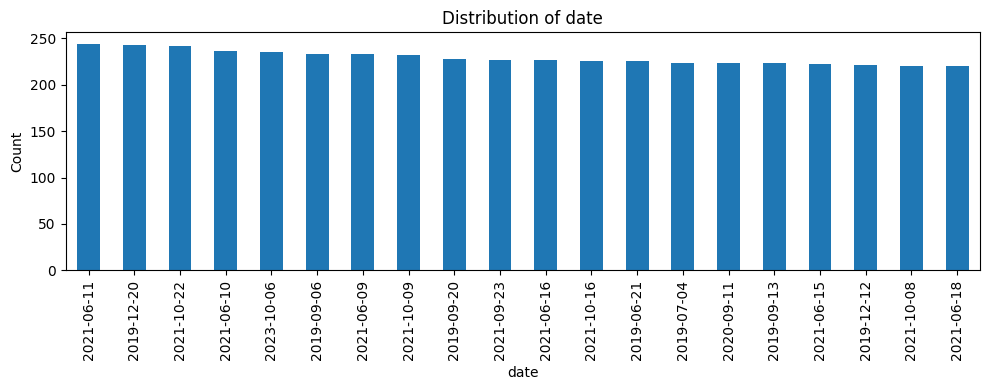

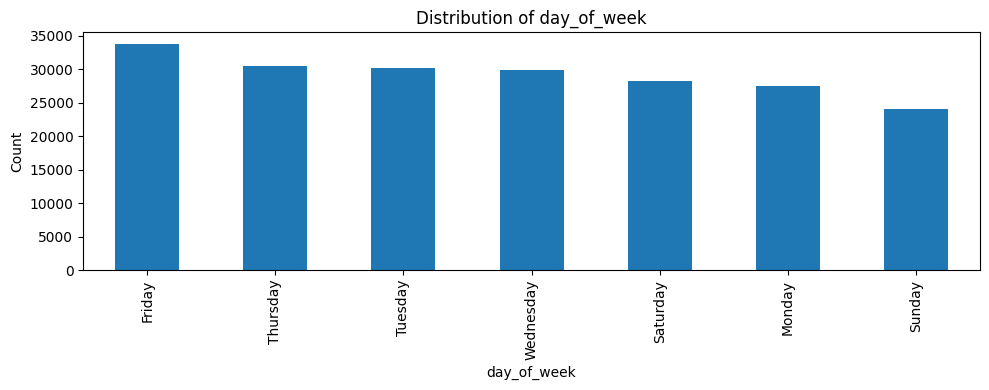

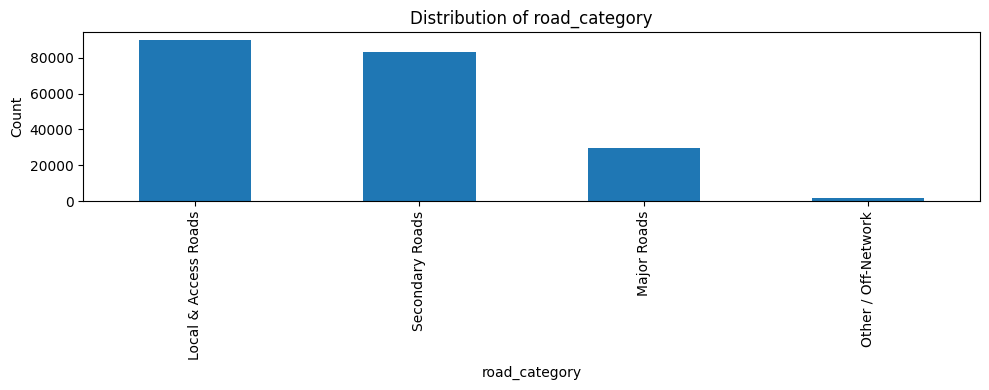

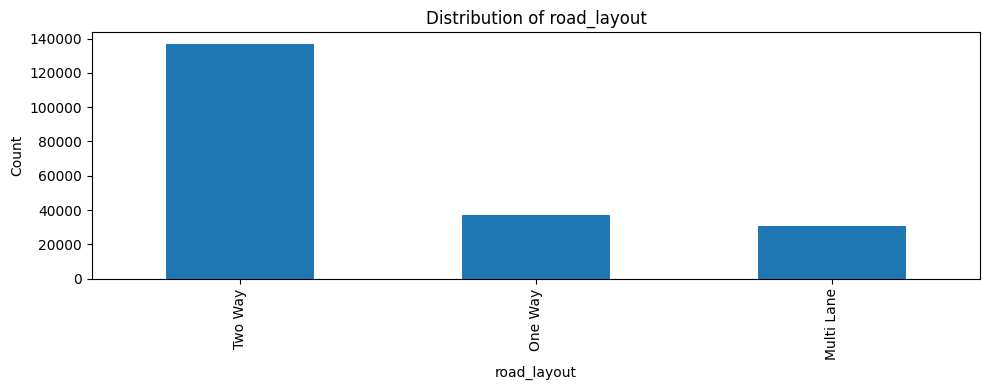

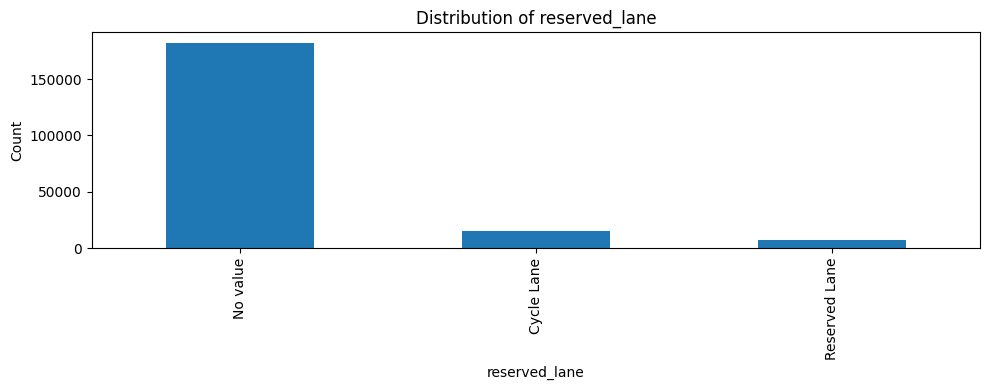

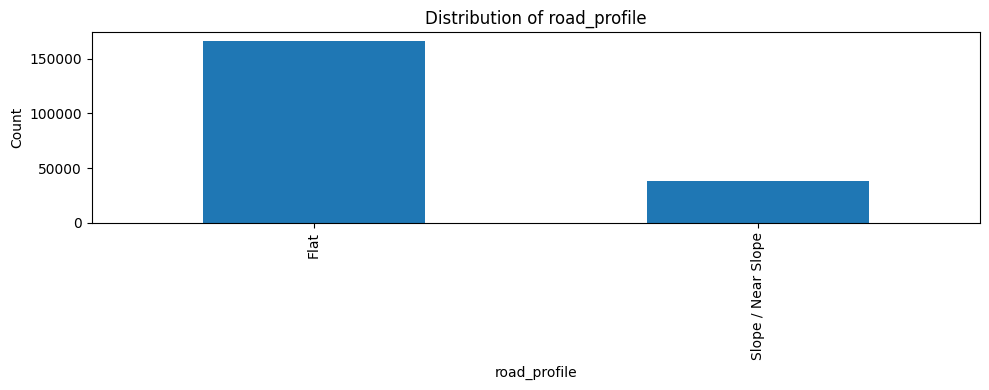

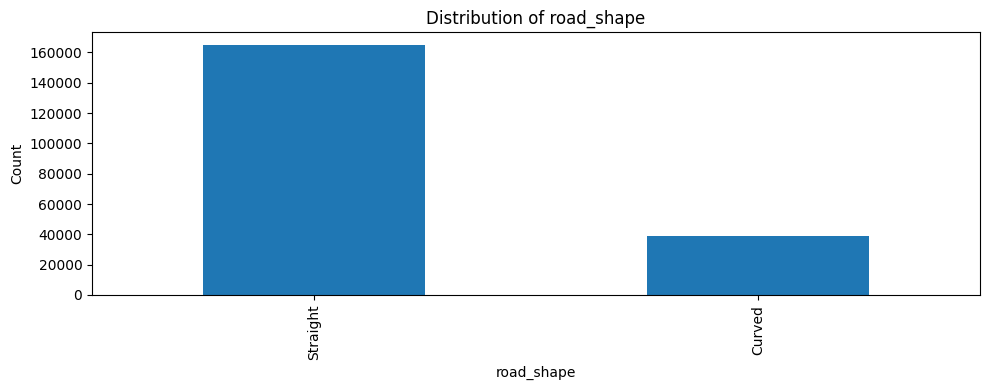

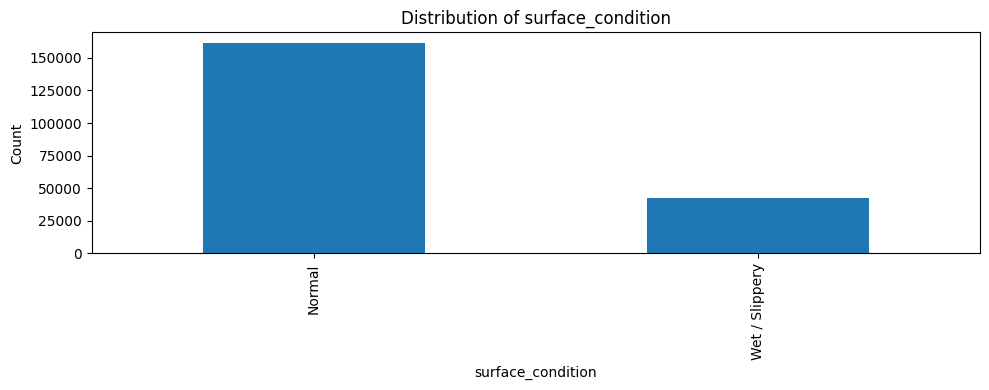

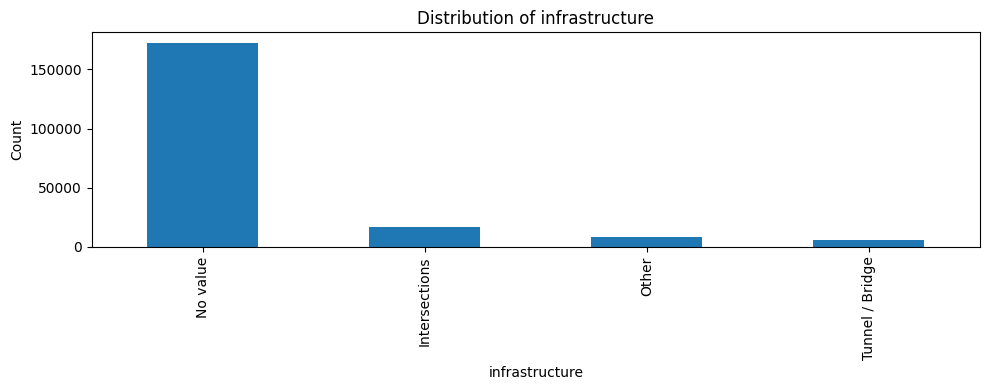

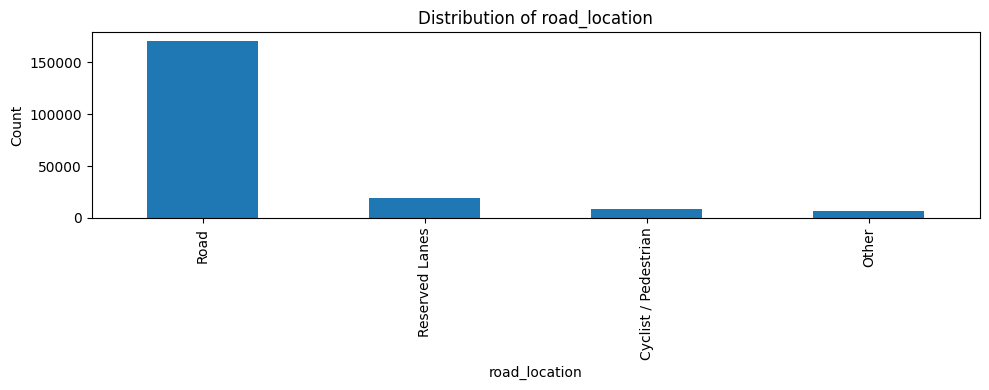

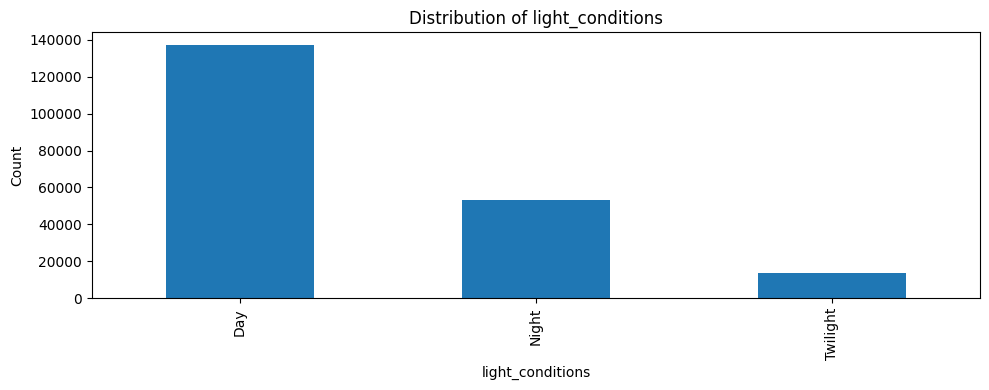

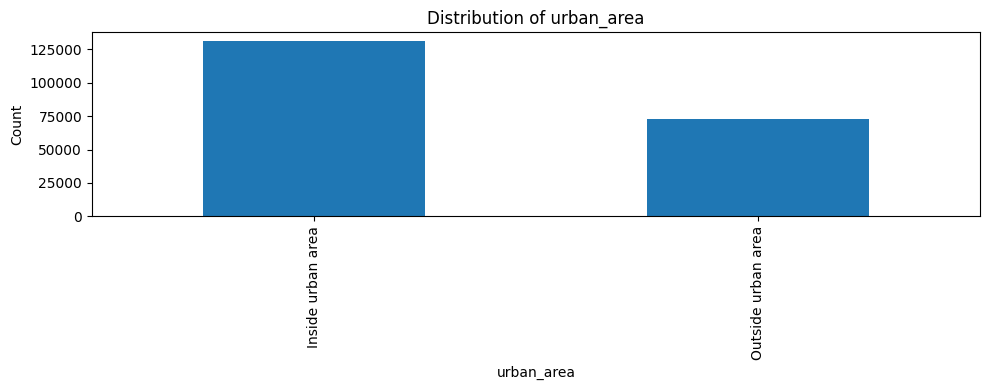

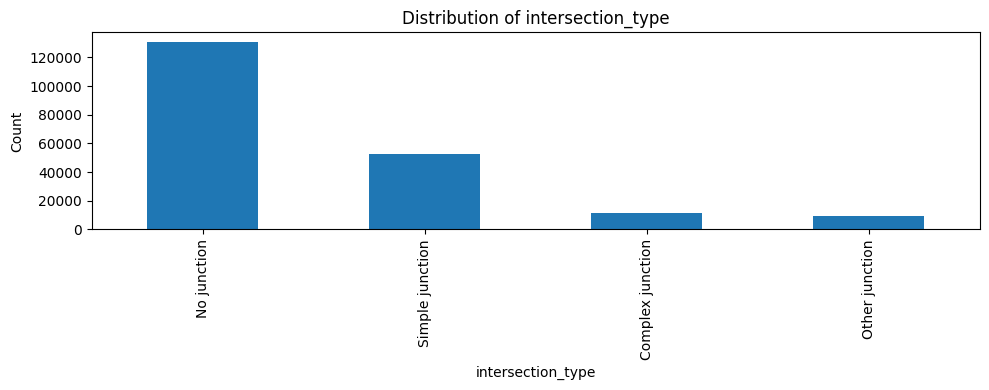

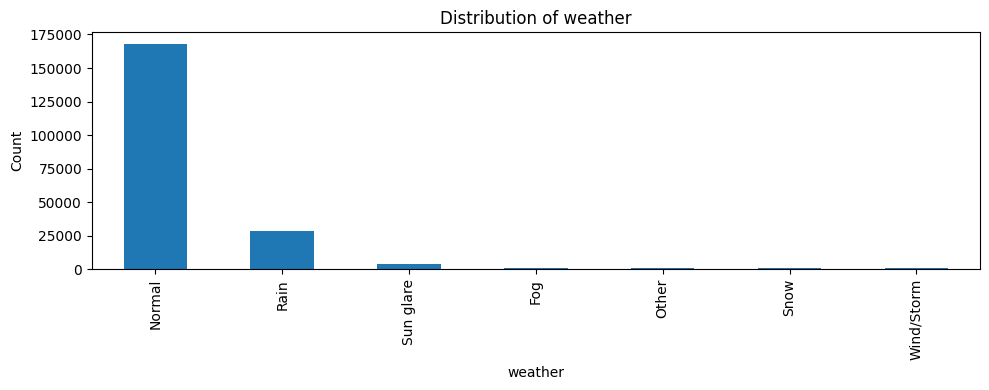

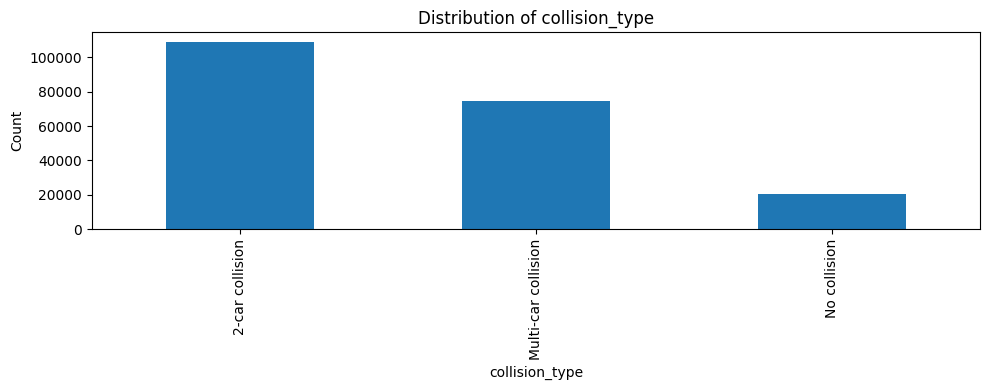

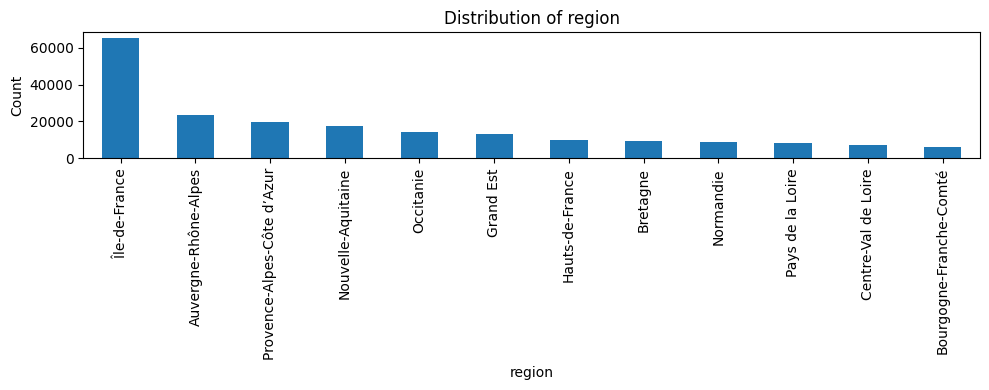

In [11]:
# 5) BAR PLOTS FOR CATEGORICAL VARIABLES

print("\n=== CATEGORICAL DISTRIBUTIONS ===")

for col in cat_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(20).plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


=== CORRELATION HEATMAP (NUMERIC FEATURES) ===


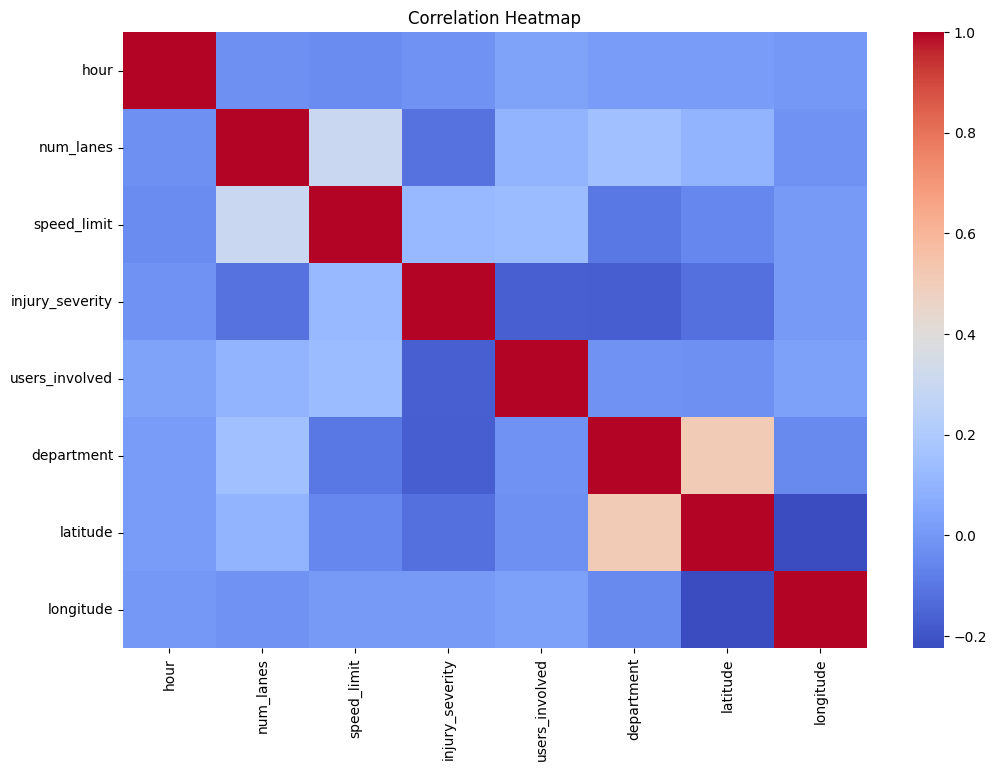

In [12]:
# 6) CORRELATION HEATMAP

print("\n=== CORRELATION HEATMAP (NUMERIC FEATURES) ===")
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [13]:
# 7) SAVE CLEAN SUMMARY STATS

df.describe().to_csv("numeric_summary_stats.csv")
df[cat_cols].describe().to_csv("categorical_summary_stats.csv")

print("\nSaved summary statistics:")
print(" - numeric_summary_stats.csv")
print(" - categorical_summary_stats.csv")


Saved summary statistics:
 - numeric_summary_stats.csv
 - categorical_summary_stats.csv
